Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from termcolor import colored

from sklearn import set_config
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth, AffinityPropagation, Birch, DBSCAN, OPTICS, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as sch
    
from yellowbrick.cluster import KElbowVisualizer

Load the data

In [2]:
cc_data = pd.read_csv('Customer_Data.csv')

Preprocessing, EDA, Data Transformation

In [3]:
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print(cc_data.shape) #(8950, 18)
print('-------------')
# 
#print(cc_data.describe()) 
print('-------------')
#
print(cc_data.isnull().sum().sum()) #314 So we have to clear
print('-------------')
#
print(cc_data.duplicated().sum()) #0
#
#print(cc_data.info()) # all numbers X customer ID column is object will remove as not needed

(8950, 18)
-------------
-------------
314
-------------
0


In [5]:
# Removing Customer ID column as not needed
cc_data.drop('CUST_ID', axis = 1, inplace = True)

In [6]:
# Filling the N/A values we use median as the data do not follow normal distribution 

imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='median')
imputer.fit(cc_data)
cc_data = pd.DataFrame(imputer.transform(cc_data), columns = cc_data.columns)

In [7]:
cc_data.isnull().sum().sum() # No N/As anymore

0

In [8]:
cc_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


# Modeling 


We are dealing with unsupervised learning algorithm

We are dealing with clustering or PCA

Therefore we are going to use Standard Scaler to ensure features are on the same scale (mean = 0, variance = 1).

In [9]:
ss = StandardScaler()
#fit scaler on numeric features
ss.fit(cc_data)
#scale numeric features now
X = ss.transform(cc_data)

Dealing with outliers - Isolation Forest 

In [10]:
iforest = IsolationForest(max_samples=50,bootstrap=True, n_jobs=-1,verbose=True)
pred= iforest.fit_predict(X)
# Create two new columns with the outcome of the isolation forest.
# "scores" for the Average anomaly score of X of the base classifiers. Negative Values are outleirs.
cc_data['scores']=iforest.decision_function(X)
cc_data['anomaly_label']=pred
# -1 outcome of "fit_predict" function indicates an anomaly of data or an outlier in other words.
cc_data['anomaly']=cc_data['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done   2 out of  28 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=28)]: Done  28 out of  28 | elapsed:    0.0s finished


In [11]:
fig=px.histogram(cc_data,x='scores',color='anomaly')
fig.show()

#the histogram shows how the 'scores' are distributed for normal data points(scores>0) versus anomalous data points (scores <0).

In [12]:
#Keep only inliners to enhance model performace and maintain data quality
cc_data=cc_data[cc_data.anomaly_label==1]

In [13]:
cc_data.shape # Number of observations is reduced now because we removed the outliers detected

(6941, 20)

In [14]:
# We can now bring back the dataset to the original columns by removing those created recently

cc_data=cc_data.drop(columns=["scores","anomaly_label","anomaly"])
cc_data.shape

(6941, 17)

In [15]:
cc_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.0,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.0,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.0,12.0


PCA - dimensionality reduction (to reduce the number of features, to identify relationships and patterns in the data and express them as PCs, to visualise high dimension data in lower dimensional space, to reduce irrelevant information in the data)

In [16]:
X=cc_data

# Fit PCA with all components to determine explained variance

pca = PCA()
pca.fit(X)

PCA()

In [17]:

explained_variance = pca.explained_variance_ratio_#computes the ratio of variance explained by each principal component obtained from PCA.
print("Explained variance ratio:", explained_variance)
cumulative_variance = explained_variance.cumsum()#This calculates the cumulative sum of the explained variance ratios.
n_components = (cumulative_variance < 0.99).sum() +1 #This line determines how many principal components are needed to explain at least 99% of the variance in the data.
print(f'By using the {n_components} components we can explain 99% of the variance present in the original dataset')

Explained variance ratio: [5.12565044e-01 2.41706106e-01 1.11616644e-01 5.81289268e-02
 4.61060915e-02 2.13712591e-02 8.50035161e-03 3.43351570e-06
 1.43094970e-06 6.06294793e-07 9.18169209e-08 5.81207342e-09
 3.19162877e-09 2.80771883e-09 1.81632627e-09 3.71176376e-10
 1.65877818e-10]
By using the 6 components we can explain 99% of the variance present in the original dataset


In [18]:
# Now we fit PCA with the optimal number of components found

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_pca

array([[-2969.28203782,  -330.43924432,  -384.31707551,  -392.04070278,
          221.39428751,  -276.96964619],
       [ 3937.617414  ,  -628.00284696,  -572.09988914,  -837.41833227,
         -950.40791433,   181.27122106],
       [ 3654.74179711, -1242.87371764, -1092.73898088,  -839.58809255,
         -628.78555997,  1332.22255666],
       ...,
       [-2941.56750475,  -191.37141059,  -479.98804242,  -238.1673713 ,
          156.87574627,  -109.72603109],
       [-2993.92829964,  -395.98892964,  -413.52242293,  -481.40230751,
          227.16302386,  -194.70710875],
       [-3471.12689331,  -291.57938634,  -258.46568743,  -534.63192787,
          275.27265191,  -292.31015234]])

In [19]:
#Create a DataFrame (pca_cc_data) that holds the principal component scores obtained after applying PCA to the original dataset (cc_data).
#Each column in pca_cc_data corresponds to a principal component, and the number of columns is equal to the number of principal components used in the PCA.
pca_cc_data = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_cc_data

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2969.282038,-330.439244,-384.317076,-392.040703,221.394288,-276.969646
1,3937.617414,-628.002847,-572.099889,-837.418332,-950.407914,181.271221
2,3654.741797,-1242.873718,-1092.738981,-839.588093,-628.785560,1332.222557
3,-2505.310043,11.273825,130.471631,-285.147279,-247.700229,-525.725463
4,-1297.577290,2105.466684,-301.212941,579.262806,-1154.244777,432.849182
...,...,...,...,...,...,...
6936,-75.142856,-908.797488,-1225.712621,-375.038984,-6.438421,819.600432
6937,-2966.706286,-421.186780,-355.531726,-225.950191,110.183746,-138.320877
6938,-2941.567505,-191.371411,-479.988042,-238.167371,156.875746,-109.726031
6939,-2993.928300,-395.988930,-413.522423,-481.402308,227.163024,-194.707109


In [20]:
components = pca.components_ #This line extracts the principal component loadings from the PCA model.

In the provided code snippet, the term "threshold" is used to define a cut-off value for determining which features (or variables) are considered significant for each principal component in a Principal Component Analysis (PCA).

In [21]:
components_df = pd.DataFrame(components, columns=cc_data.columns) # Create a DataFrame (components_df) that holds the principal component loadings obtained after applying PCA to the original dataset (cc_data).
components_df      #Each row in components_df corresponds to a principal component, and each column corresponds to a feature in the original dataset.
threshold = 0.57   #This line sets the threshold value for determining which principal component loadings are significant.
significant_features = (components_df.abs() > threshold).apply(lambda x: cc_data.columns[x].tolist(), axis=1)   #This line determines which principal component loadings are significant by comparing them to the threshold value.
pca_list = []#This line initializes an empty list (pca_list) to store the significant principal component loadings.
for i, features in enumerate(significant_features):#This line iterates over the significant principal component loadings and prints them to the console.
    print(f"Principal Component {i+1}: {features}")#This line appends the significant principal component loadings to the pca_list.
    pca_list.append(f"Principal Component {i+1}: {features}")#This line appends the significant principal component loadings to the pca_list.

Principal Component 1: ['CREDIT_LIMIT']
Principal Component 2: ['MINIMUM_PAYMENTS']
Principal Component 3: ['BALANCE', 'CASH_ADVANCE']
Principal Component 4: ['PAYMENTS']
Principal Component 5: ['CASH_ADVANCE']
Principal Component 6: ['PURCHASES']


In [22]:
print(pca_list)

["Principal Component 1: ['CREDIT_LIMIT']", "Principal Component 2: ['MINIMUM_PAYMENTS']", "Principal Component 3: ['BALANCE', 'CASH_ADVANCE']", "Principal Component 4: ['PAYMENTS']", "Principal Component 5: ['CASH_ADVANCE']", "Principal Component 6: ['PURCHASES']"]


# Clustering 

### Visualize the results of clustering using the k-means elbow method

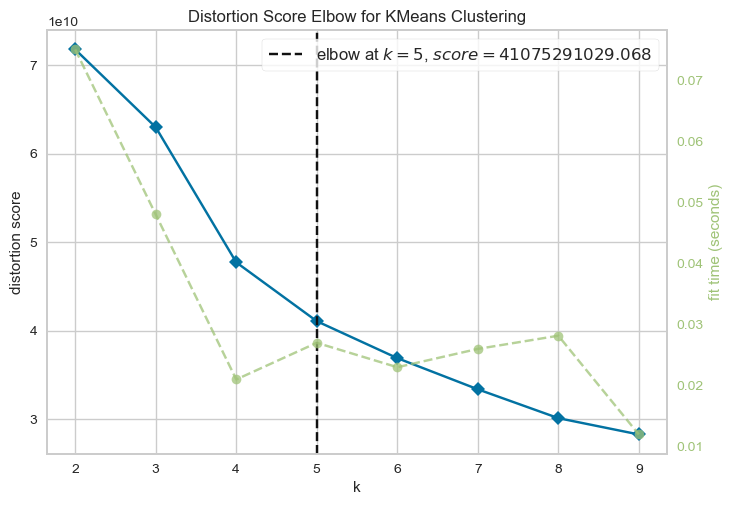

In [23]:
# Initiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), locate_elbow=True)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

Vis 2 to double check 

In [24]:
'''k means - determine optimal k'''
K = range(2,10)
kmeans = [KMeans(n_clusters=k, n_init='auto') for k in K]
score = [kmeans[k].fit(X_pca).score(X_pca) for k in range(len(kmeans))]
print(score)

[-71792544193.43509, -61679551882.30102, -48026858512.04813, -41072501609.2974, -36900275996.44519, -34092819347.27594, -30684365117.416218, -27880036055.294918]


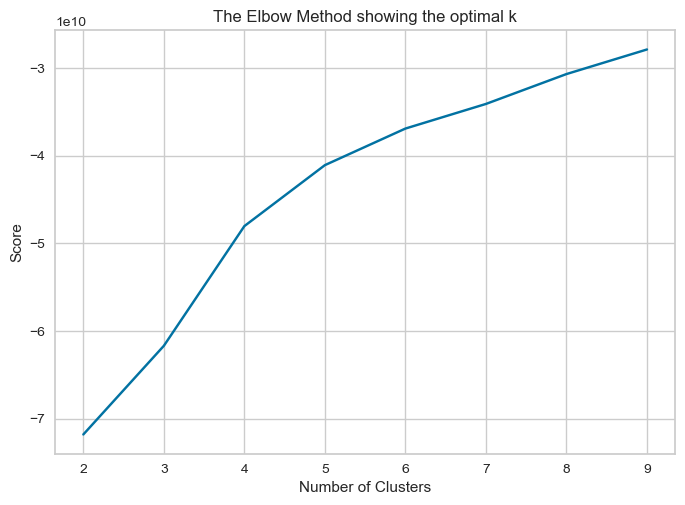

In [25]:
# plot the elbow

plt.plot(K, score, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the elbow method, both 4 can be considered as potential numbers of clusters.

### Visualize the clustering results using the k-means silhouette score method

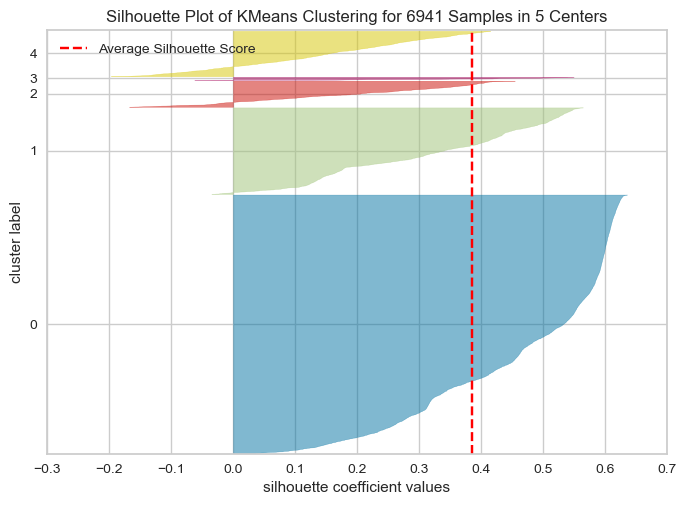

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 6941 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.48299911141571755


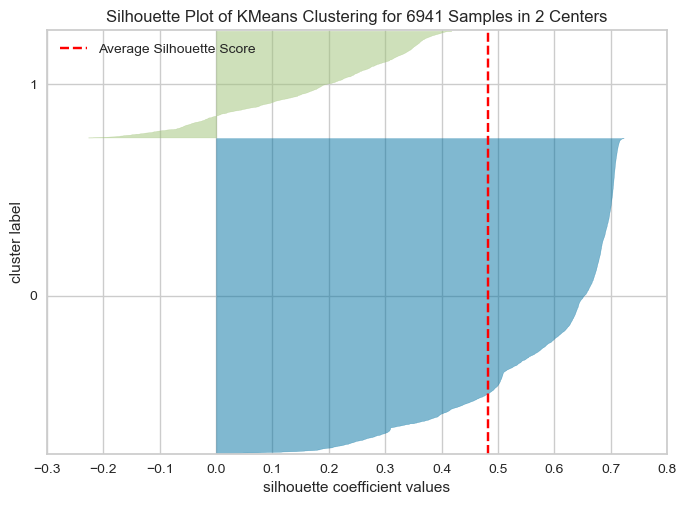

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.4885432713620028


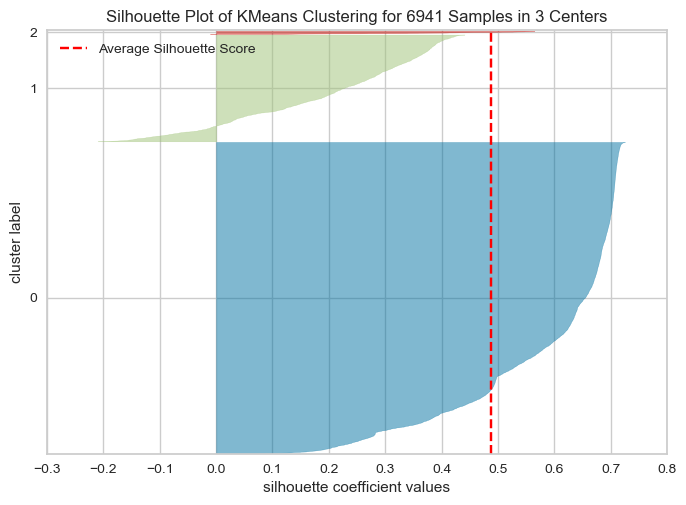

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.4667753190684604


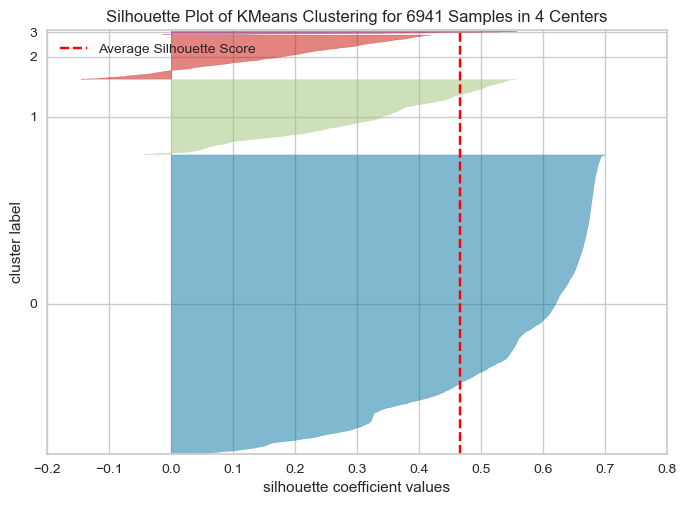

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.38449396226580884


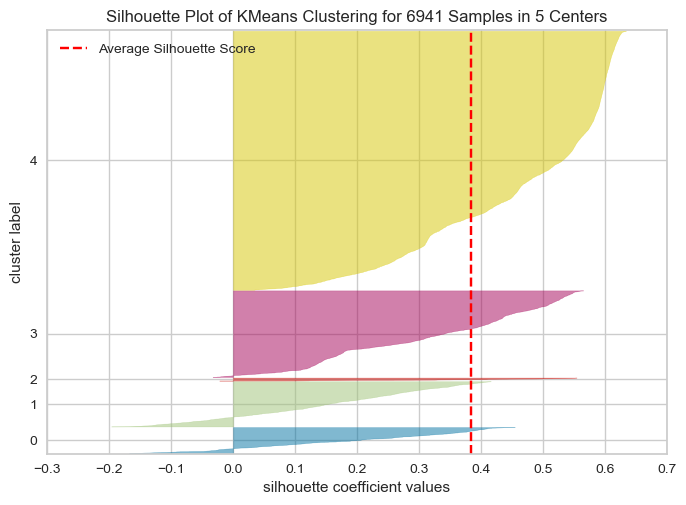

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : 0.3603336921648382


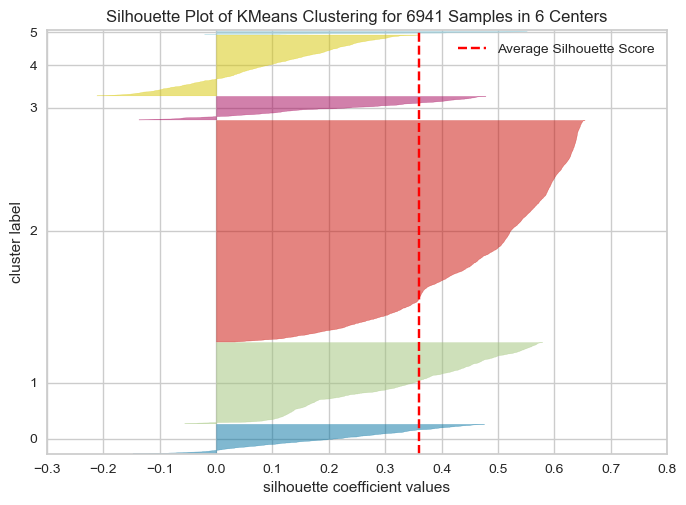

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.36527137184549546


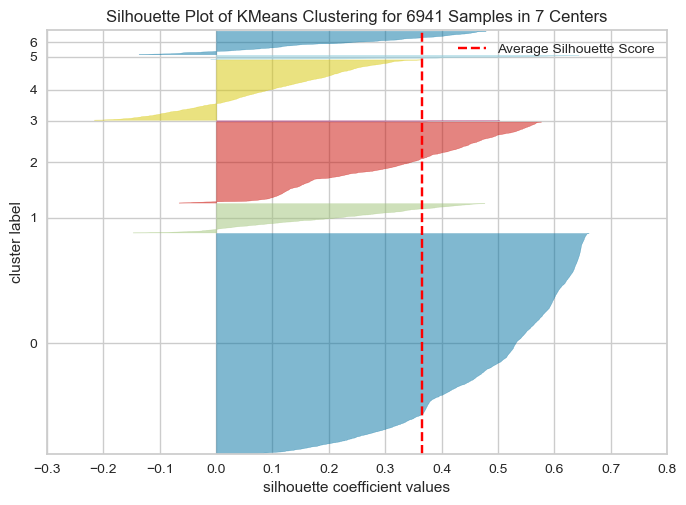

In [27]:
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()

for n_clusters in n_clusters:

    print('-'*70)

    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'lloyd'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(X_pca)

    silhouette_avg = silhouette_score(X_pca, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X_pca)        # Fit the data to the visualizer
    visualizer.poof()

According to k-means clustering, 4 is considered a good number of clusters based on silhouette scores.

### Visualize the outcomes of hierarchical clustering through the use of a dendrogram generated using SciPy's hierarchical clustering (linkage) methods.


In [28]:
# Generate the linkage matrix

Z = linkage(X_pca, 'complete') # complete distance produces more meaningfull clusters in this case

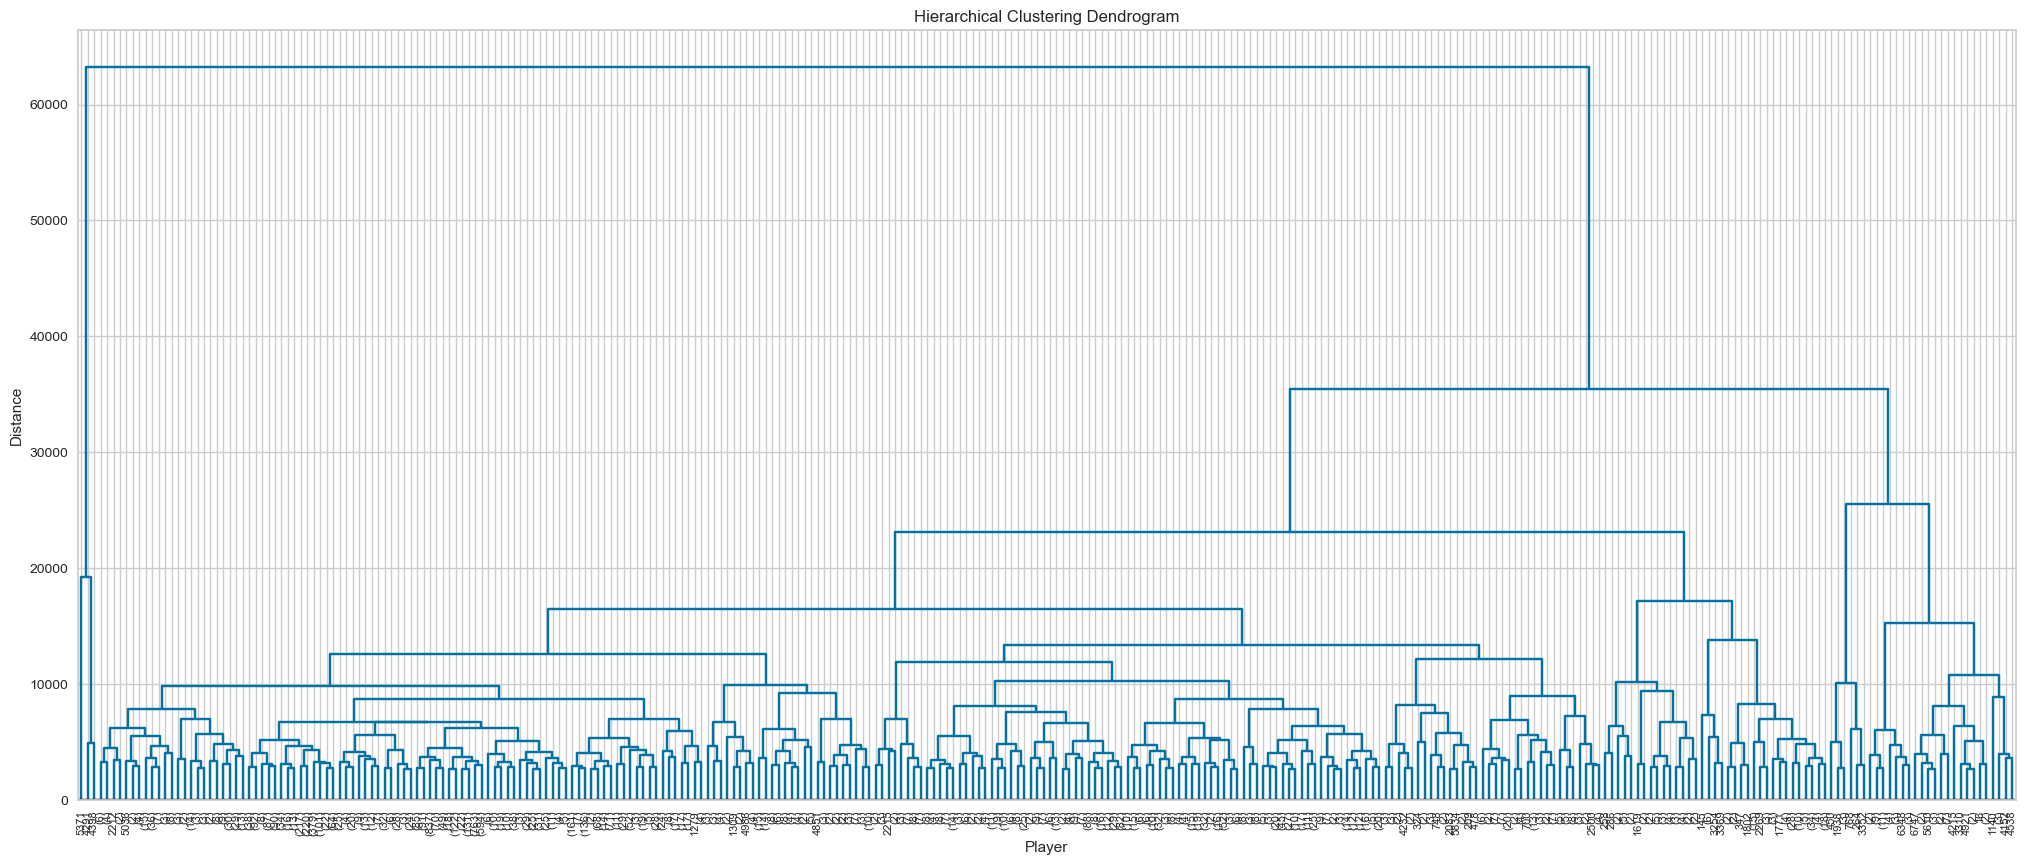

In [29]:
# set cut-off
max_d = 15

# plot the dendogram

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Player')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=300,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
    color_threshold = max_d
)
plt.axhline(y=max_d, c='k')
plt.show()

According to the dendogram, 4 can be considered as potential numbers of clusters.

### Visualize the clustering results obtained from hierarchical clustering using the sklearn library's AgglomerativeClustering function.

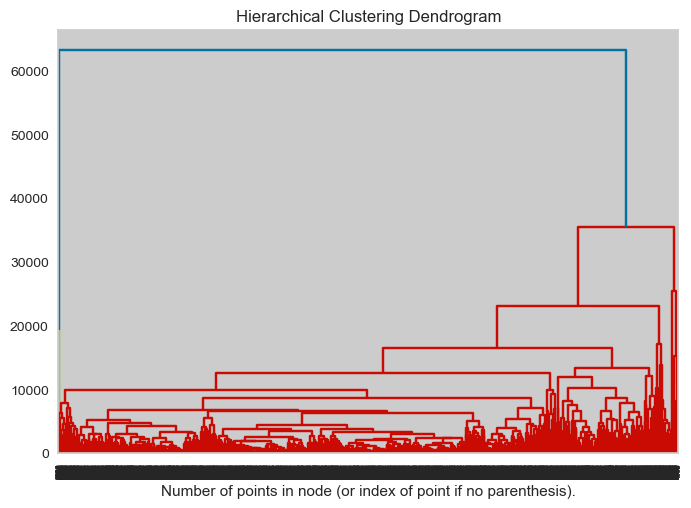

In [30]:
# Create Dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

model = model.fit(X_pca)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

According to agglomerative clustering, both 4 and 5 are viable options for the number of clusters.

# With clusters = 4 and 7 PCs , we will model our data

In [31]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='complete') 
cluster.fit_predict(X_pca)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
print(cluster.labels_)# This line prints the cluster labels assigned to each observation in the dataset.

[0 0 0 ... 0 0 0]


In [33]:
# attribute clusters to the original dataset
y_cluster = cluster.labels_
y_cluster_df = pd.DataFrame(y_cluster) #This line creates a DataFrame (y_cluster_df) that holds the cluster labels assigned to each observation in the dataset.
y_cluster_df.rename({0: 'cluster'}, axis=1, inplace=True) #This line renames the column in y_cluster_df to 'cluster'.
y_cluster_df

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
6936,0
6937,0
6938,0
6939,0


In [34]:
y_cluster_df['cluster'].unique()

array([0, 2, 3, 1], dtype=int64)

In [35]:
pca_cluster_df = pd.concat([pca_cc_data, y_cluster_df], axis=1) #This line concatenates the pca_cc_data and y_cluster_df DataFrames along the columns axis.

In [36]:
pca_cluster_df.shape

(6941, 7)

In [37]:
# I want to rename the columns to include the feature name from the original df, and see which PCA includes what feature

old_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
new_column_names = pca_list + ['cluster']  # Add 'cluster' to the end

# Rename the columns
pca_cluster_df.columns = new_column_names

pca_cluster_df

,Principal Component 1: ['CREDIT_LIMIT'],Principal Component 2: ['MINIMUM_PAYMENTS'],"Principal Component 3: ['BALANCE', 'CASH_ADVANCE']",Principal Component 4: ['PAYMENTS'],Principal Component 5: ['CASH_ADVANCE'],Principal Component 6: ['PURCHASES'],cluster
0,-2969.282038,-330.439244,-384.317076,-392.040703,221.394288,-276.969646,0
1,3937.617414,-628.002847,-572.099889,-837.418332,-950.407914,181.271221,0
2,3654.741797,-1242.873718,-1092.738981,-839.588093,-628.785560,1332.222557,0
3,-2505.310043,11.273825,130.471631,-285.147279,-247.700229,-525.725463,0
4,-1297.577290,2105.466684,-301.212941,579.262806,-1154.244777,432.849182,0
...,...,...,...,...,...,...,...
6936,-75.142856,-908.797488,-1225.712621,-375.038984,-6.438421,819.600432,0
6937,-2966.706286,-421.186780,-355.531726,-225.950191,110.183746,-138.320877,0
6938,-2941.567505,-191.371411,-479.988042,-238.167371,156.875746,-109.726031,0
6939,-2993.928300,-395.988930,-413.522423,-481.402308,227.163024,-194.707109,0


In [38]:
# Check average PCA values per cluster, groupby'''

avg_cluster = pca_cluster_df.groupby('cluster').median()
avg_cluster

,Principal Component 1: ['CREDIT_LIMIT'],Principal Component 2: ['MINIMUM_PAYMENTS'],"Principal Component 3: ['BALANCE', 'CASH_ADVANCE']",Principal Component 4: ['PAYMENTS'],Principal Component 5: ['CASH_ADVANCE'],Principal Component 6: ['PURCHASES']
cluster,,,,,,
0,-974.274666,-251.867943,-141.492847,-277.302336,37.513130,-119.451868
1,12516.914244,39191.643525,-13359.217230,3442.506895,5066.161389,146.018714
2,39.015207,9872.489112,-3099.993585,165.478572,856.623994,-22.975453
3,4271.087556,24122.560428,-9267.383463,578.683510,2201.396281,188.995284


In [39]:
avg_cluster.columns

Index(['Principal Component 1: ['CREDIT_LIMIT']',
       'Principal Component 2: ['MINIMUM_PAYMENTS']',
       'Principal Component 3: ['BALANCE', 'CASH_ADVANCE']',
       'Principal Component 4: ['PAYMENTS']',
       'Principal Component 5: ['CASH_ADVANCE']',
       'Principal Component 6: ['PURCHASES']'],
      dtype='object')

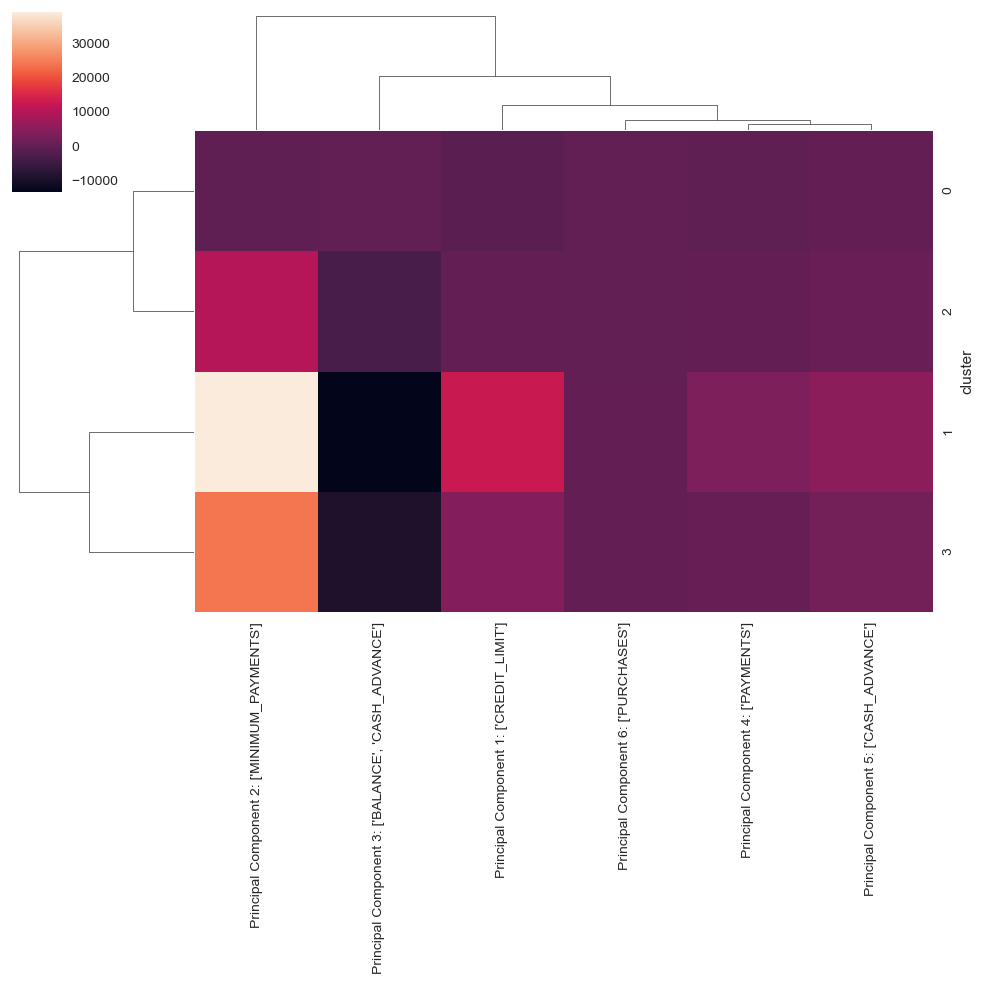

In [40]:
sns.clustermap(avg_cluster)
None

Cluster 0
Principal Component 1 (Credit Limit): The value is significantly negative (-964.44), indicating that individuals in this cluster generally have lower credit limits.
Principal Component 2 (Minimum Payments): The value is moderately negative (-324.35), suggesting these individuals make lower minimum payments compared to others.
Principal Component 3 (Cash Advance): The value is positive (123.71), indicating a moderate use of cash advances.
Principal Component 4 (Payments): The value is negative (-223.65), showing lower overall payments.
Principal Component 5 (Balance): The value is slightly positive (67.26), indicating a relatively average balance.
Principal Component 6 (Purchases): The value is positive (121.61), showing moderate purchases.
Principal Component 7 (One-off Purchases and Installment Purchases): The value is negative (-46.53), indicating fewer one-off and installment purchases.
Conclusion: Cluster 0 likely represents users with lower credit limits and lower overall payments but moderate purchases and some use of cash advances.

Cluster 1
Principal Component 1 (Credit Limit): The value is highly positive (2255.49), indicating higher credit limits.
Principal Component 2 (Minimum Payments): The value is positive (592.18), suggesting higher minimum payments.
Principal Component 3 (Cash Advance): The value is significantly negative (-4846.05), indicating minimal use of cash advances.
Principal Component 4 (Payments): The value is highly positive (7695.10), indicating higher overall payments.
Principal Component 5 (Balance): The value is positive (1228.14), indicating a higher balance.
Principal Component 6 (Purchases): The value is highly positive (2320.79), showing significant purchases.
Principal Component 7 (One-off Purchases and Installment Purchases): The value is significantly negative (-415.12), indicating fewer one-off and installment purchases.
Conclusion: Cluster 1 likely represents high-credit individuals who make substantial payments and purchases but rarely use cash advances.

Cluster 2
Principal Component 1 (Credit Limit): The value is slightly positive (119.41), indicating slightly higher credit limits.
Principal Component 2 (Minimum Payments): The value is highly positive (11945.70), suggesting these individuals make the highest minimum payments.
Principal Component 3 (Cash Advance): The value is highly positive (5781.20), indicating extensive use of cash advances.
Principal Component 4 (Payments): The value is positive (1319.30), indicating higher overall payments.
Principal Component 5 (Balance): The value is highly positive (1774.80), indicating a higher balance.
Principal Component 6 (Purchases): The value is negative (-246.18), indicating lower purchases.
Principal Component 7 (One-off Purchases and Installment Purchases): The value is negative (-178.91), indicating fewer one-off and installment purchases.
Conclusion: Cluster 2 likely represents individuals with higher credit limits and high balances who frequently use cash advances and make large minimum payments but have lower overall purchases.

Cluster 3
Principal Component 1 (Credit Limit): The value is highly positive (5471.95), indicating the highest credit limits.
Principal Component 2 (Minimum Payments): The value is extremely positive (48756.33), suggesting the highest minimum payments.
Principal Component 3 (Cash Advance): The value is extremely positive (23623.02), indicating very high use of cash advances.
Principal Component 4 (Payments): The value is extremely positive (10027.31), indicating very high overall payments.
Principal Component 5 (Balance): The value is extremely positive (7754.76), indicating very high balances.
Principal Component 6 (Purchases): The value is highly negative (-1102.89), indicating very low purchases.
Principal Component 7 (One-off Purchases and Installment Purchases): The value is negative (-219.78), indicating fewer one-off and installment purchases.
Conclusion: Cluster 3 likely represents individuals with the highest credit limits and balances who make very high payments and extensively use cash advances, but they have very low purchase activity.

Overall Summary

Cluster 0: Lower credit limits and payments, moderate purchases and cash advances.

Cluster 1: High credit limits, payments, and purchases, minimal cash advances.

Cluster 2: Higher credit limits and balances, frequent cash advances, high minimum payments, lower purchases.

Cluster 3: Highest credit limits and balances, very high payments and cash advances, minimal purchase activity.

These clusters highlight distinct behaviors and characteristics of credit card users, which can help in tailoring financial products and services to meet their specific needs.

Summary of Profiles
Conservative Users (Cluster 0): Lower limits and payments, moderate purchases and cash advances.

High-Activity Users (Cluster 1): High limits, balances, payments, and purchases; minimal cash advances.

Cash-Dependent Users (Cluster 2): High limits and balances, very high minimum payments and cash advances, lower purchases.

High Credit, Low Purchase Users-Business users (Cluster 3): Highest limits and balances, very high payments and cash advances, minimal purchases.

These profiles can be useful for targeting marketing efforts, designing tailored financial products, and understanding customer behavior to enhance service offerings.

Cluster 0: Profile: These users are conservative with their credit usage. They tend to have lower credit limits and make lower payments. They engage in moderate levels of purchases and cash advances but tend to avoid large one-off or installment purchases. They maintain average balances on their accounts.

Cluster 1: Profile: Profile: These users are very active with their credit cards. They have high credit limits and balances, make substantial payments, and engage in significant purchasing activity. However, they rarely use cash advances and tend to avoid one-off or installment purchases.

Cluster 2:Profile: These users rely heavily on cash advances. They have higher credit limits and balances and make very high minimum payments. They also engage in high levels of cash advances but make fewer purchases, especially one-off or installment purchases.

Cluster3: Profile: These users have the highest credit limits and balances and make very high payments. They frequently use cash advances but engage in minimal purchasing activity. They also avoid one-off and installment purchases.

recommendations 

Cluster 0: Conservative Users

Education and Awareness Campaigns: Offer educational resources to help users understand how to manage their credit responsibly and the benefits of increasing their credit limits gradually.

Reward Programs: Introduce reward programs tailored to their spending habits, offering incentives for moderate purchases and timely payments.


Cluster 1: High-Activity Users

Premium Membership: Offer premium membership programs with exclusive benefits such as higher rewards, travel perks, and personalized customer service to incentivize continued high activity.

Customized Offers: Use data analytics to personalize offers based on users' purchasing behavior, encouraging them to explore new products or services.


Cluster 2: Cash-Dependent Users

Alternative Financing Options: Introduce alternative financing options such as personal loans or installment plans with competitive interest rates to provide users with alternatives to cash advances.

Cashback Rewards: Offer cashback rewards on purchases made through the credit card to incentivize spending and reduce reliance on cash advances.


Cluster 3: High Credit, Low Purchase Users

Rewards for Diversified Spending: Encourage users to explore new spending categories by offering rewards or discounts for purchases outside their typical spending patterns.

Investment Opportunities: Provide investment opportunities or savings products tailored to users with high credit limits and balances to help them maximize their financial potential.
